# Read data from CSV using pandas

In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
dataset = pd.read_csv('Churn_Modelling.csv')
dataset = dataset.drop(["Surname","CustomerId","RowNumber"], axis=1)
y = dataset.iloc[:, 10].values # Exited
X = dataset.iloc[:,:10].values
print("Dataset shape:",dataset.shape)
print("X shape:      ",X.shape)
print("y shape:      ",y.shape)

dataset.iloc[:,:10].head()

Dataset shape: (10000, 11)
X shape:       (10000, 10)
y shape:       (10000,)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


# Data Preprocessing - Corelation between independent variables (Xi)

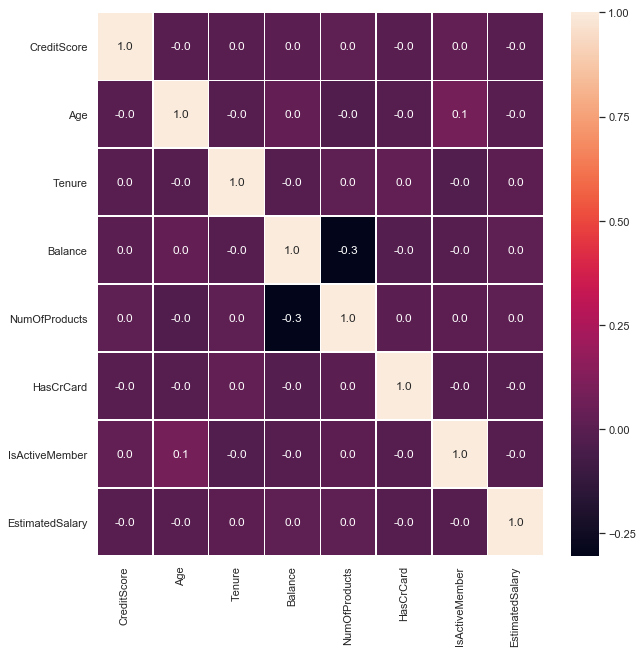

In [87]:
import seaborn as sns # data visualization library
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataset.iloc[:,:10].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)



# Histogram of variables

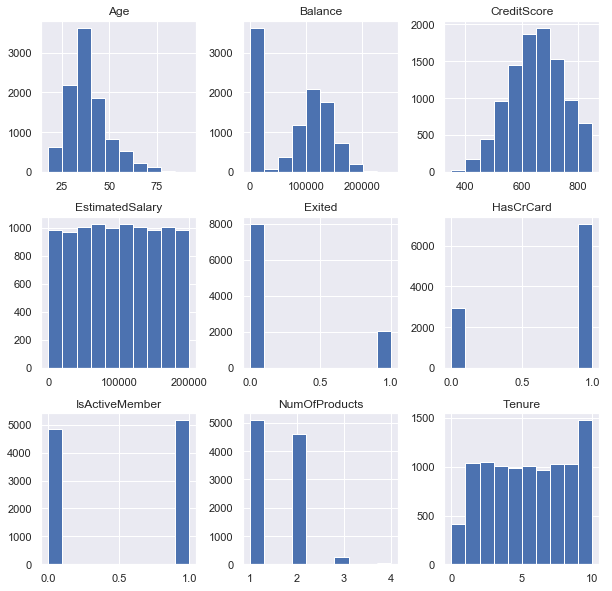

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
dataset.hist()
plt.gcf().set_size_inches(10, 10)
sns.set(color_codes=True)
# Every feature has atleast 2 different values across the dataset

# ScatterPlot 

C:\Users\saura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\saura\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\saura\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


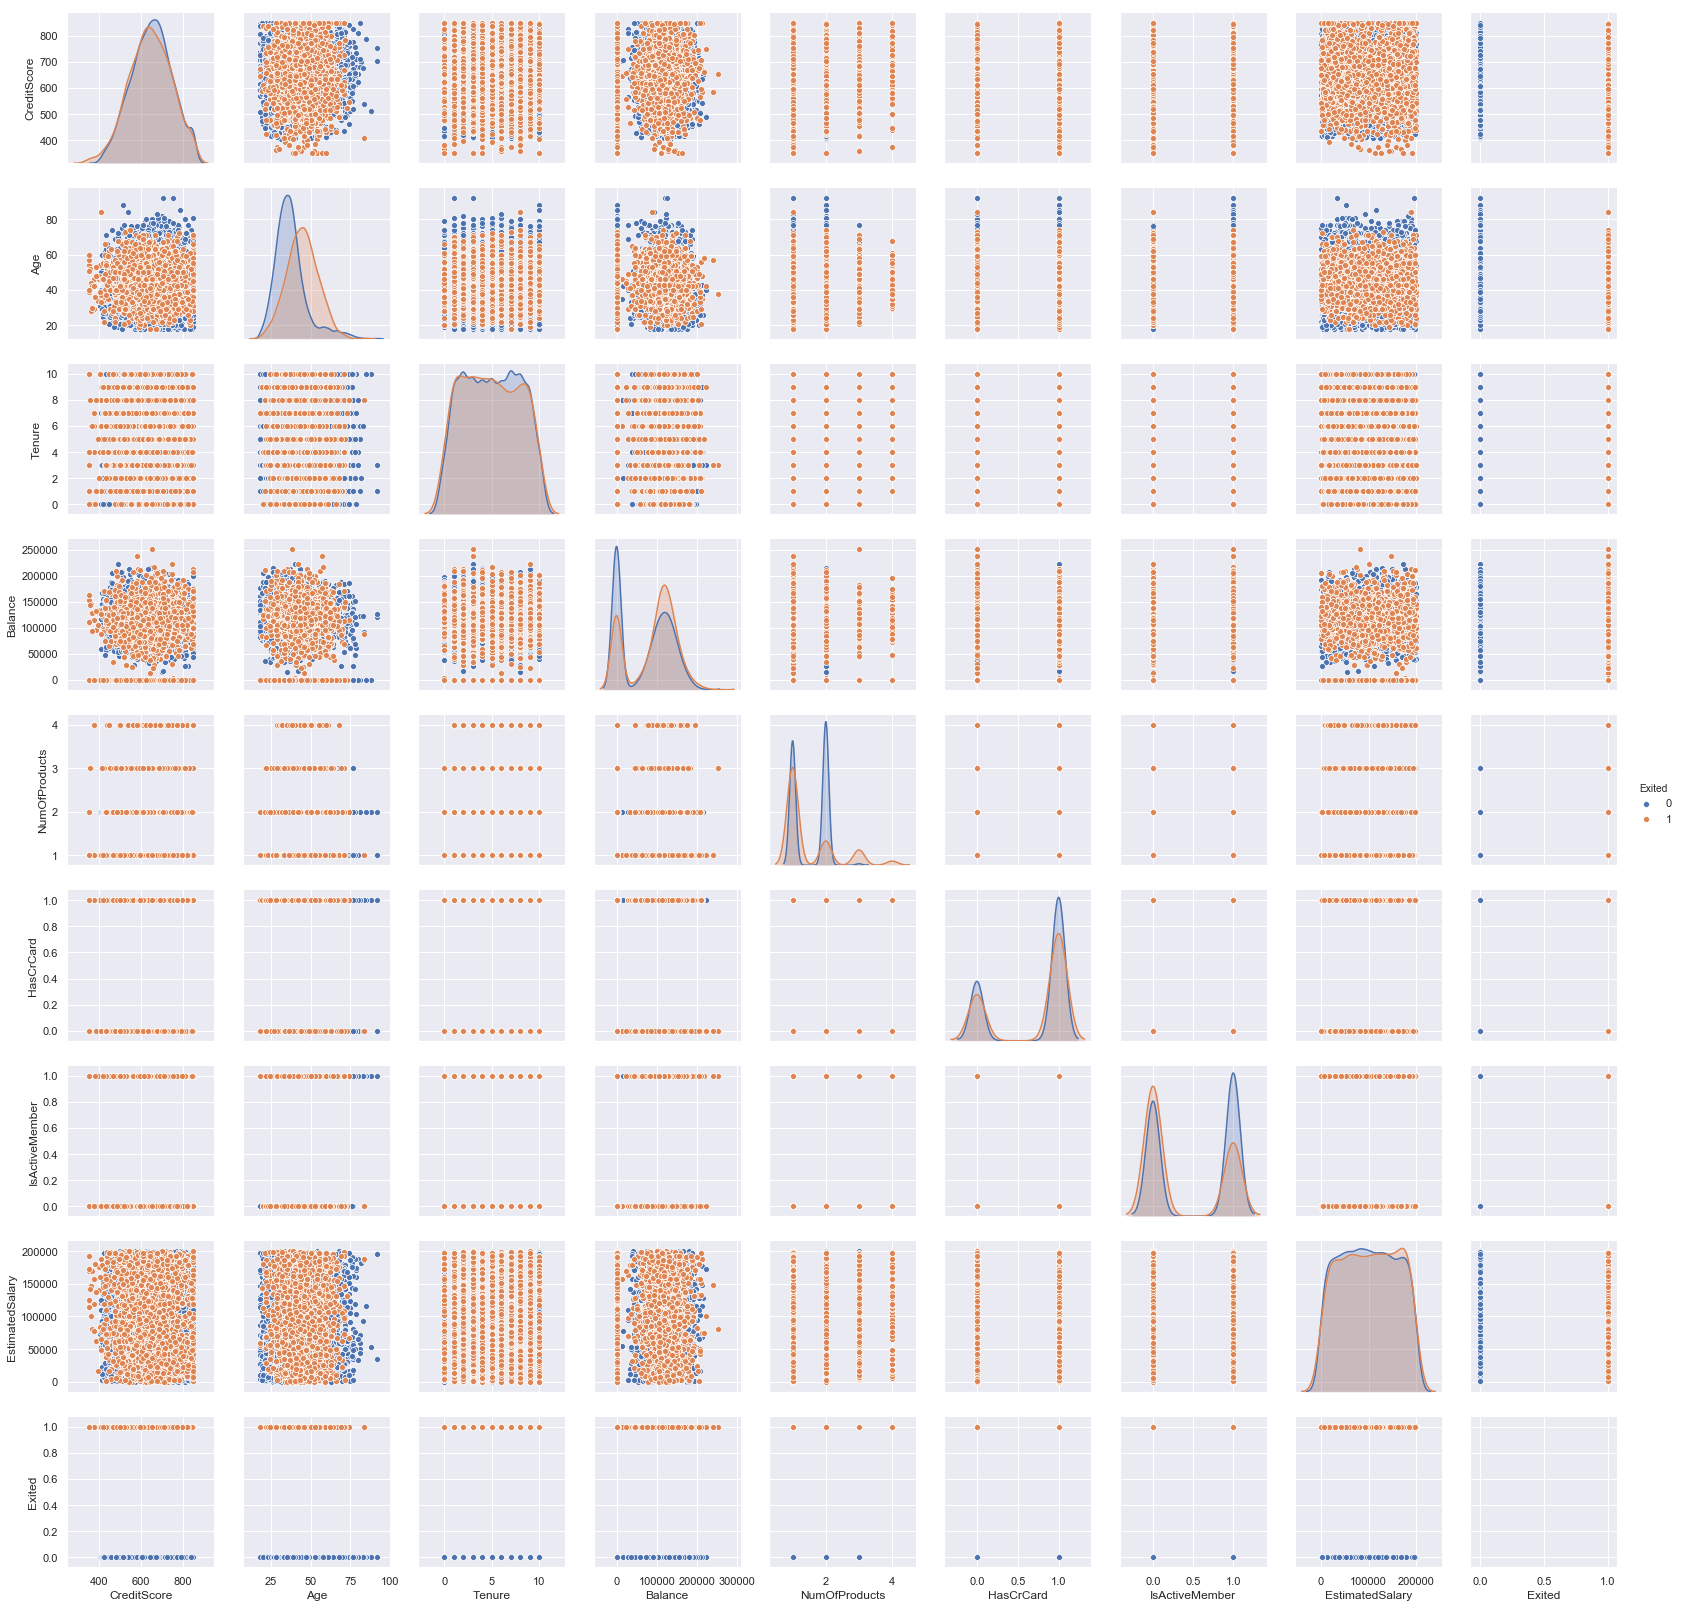

In [81]:
sns.pairplot(dataset,hue='Exited')
# We can see the blue dots are at edges and evry feature is able to seperate the exited and non exited customers.
# Hence each feature is important for us

# Encoding for categorical values

In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
laben_Country = LabelEncoder()
print(X[:8,1], '... will now become:')
X[:,1] = laben_Country.fit_transform(X[:,1])
print(X[:8,1],"\n")
laben_Gender = LabelEncoder()
print(X[:8,2], '... will now become: ')
X[:,2] = laben_Gender.fit_transform(X[:,2])
print(X[:8,2],"\n")

countryhotencoder = OneHotEncoder(categorical_features = [1]) # 1 is the country column
X = countryhotencoder.fit_transform(X).toarray()
X=X[:,1:]

print("Encoded X shape:",X.shape)
# print(X)

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become:
[0 2 0 0 2 2 0 1] 

['Female' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male' 'Female'] ... will now become: 
[0 0 0 0 0 1 1 0] 

Encoded X shape: (10000, 11)


# Data Preprocessing - Imputation 

In [83]:
print(dataset.isna().sum(),"\n\n\n")
dataset.info()
# No null values, hence imputation not required

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Data split for training and testing

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train_original, X_test, y_train_original, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

print('Training Set Shape:   ', X_train_original.shape, y_train_original.shape)
print('Test Set Shape:       ', X_test.shape, y_test.shape)

Training Set Shape:    (7000, 11) (7000,)
Test Set Shape:        (3000, 11) (3000,)


# Feature Scaling 

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train_scaled = sc.fit_transform(X_train_original)
X_test_scaled = sc.transform(X_test)

# Hyper Parameter Tuning for Random Forest

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
# number of features at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 6)]
max_depth.append(None)
criterion=['entropy','gini']
# Method of selecting samples for training each tree
bootstrap = [True,False]
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth,
 'criterion': criterion,
 'bootstrap': bootstrap  
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train_scaled, y_train_original)
# print results
print("Best Parameters for Random Forest: ",rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.6s finished


Best Parameters for Random Forest:  {'n_estimators': 40, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}


# Prediction Using Random Forest Classifier With Tuned parameters

In [56]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
Forestclassifier = RandomForestClassifier(n_estimators= 40, criterion="gini", bootstrap = False, max_depth=10, max_features = 'auto',class_weight="balanced")
Forestclassifier.fit(X_train_scaled,y_train_original)
y_predict = Forestclassifier.predict(X_test_scaled)
y_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Accuracy using Random Forest Classifier: 0.8333333333333334
Confusion matrix 
 [[2098  318]
 [ 182  402]]
             precision    recall  f1-score   support

          0       0.92      0.87      0.89      2416
          1       0.56      0.69      0.62       584

avg / total       0.85      0.83      0.84      3000



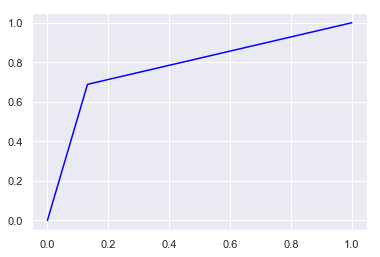

In [57]:
print("Accuracy using Random Forest Classifier:",accuracy_score(y_test, y_predict))
print("Confusion matrix \n",confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
fpr, tpr, thresholds= metrics.roc_curve(y_test,y_predict)
auc = metrics.roc_auc_score(y_test,y_predict, average='macro', sample_weight=None)
sns.set_style('darkgrid')
sns.lineplot(fpr,tpr,color ='blue')
plt.show()

# Prediction Using Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,class_weight="balanced")
classifier.fit(X_train_scaled,y_train_original)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [59]:
y_predict = classifier.predict(X_test_scaled)
y_predict

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

Accuracy using Logistic regression: 0.7053333333333334
Confusion matrix 
 [[1706  710]
 [ 174  410]]
             precision    recall  f1-score   support

          0       0.91      0.71      0.79      2416
          1       0.37      0.70      0.48       584

avg / total       0.80      0.71      0.73      3000



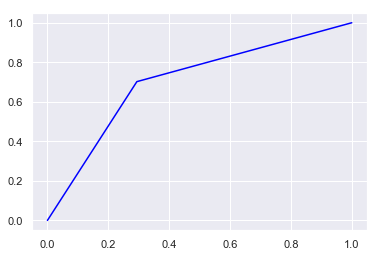

In [60]:
print("Accuracy using Logistic regression:",accuracy_score(y_test, y_predict))
print("Confusion matrix \n",confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
fpr, tpr, thresholds= metrics.roc_curve(y_test,y_predict)
auc = metrics.roc_auc_score(y_test,y_predict, average='macro', sample_weight=None)
sns.set_style('darkgrid')
sns.lineplot(fpr,tpr,color ='blue')
plt.show()